In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x_values = np.random.uniform(0, 101, 1000)
y_values = np.random.uniform(0, 101, 1000)

##### choose the value for r and d on your own

# use r = {1,2,3....10}
r=5
# use d = {3,4,10,50,100}
d = 3

In [6]:
# getting points as (x,y)
final_list = []  # to store required pair of points 
point_list = []
for i in range(len(x_values)):
  point_list.append([round(x_values[i], 2), round(y_values[i], 2)])
np_array = np.array(point_list)
coordinates = np_array.reshape(-1, 2)

## TASK_1

### plotting the points 

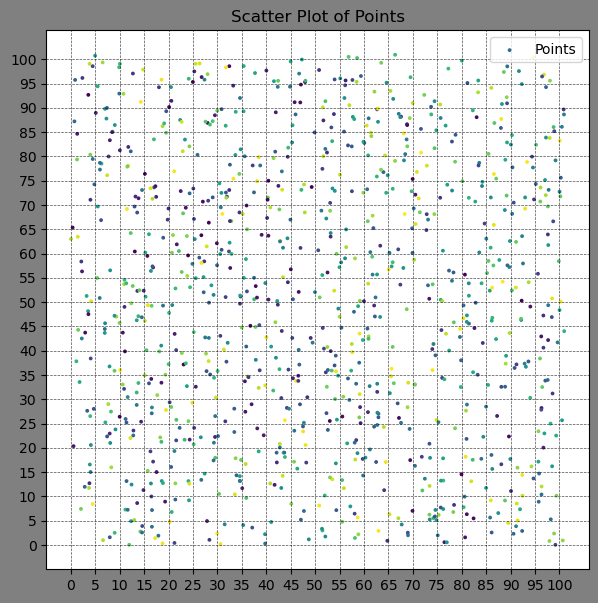

In [9]:
fig = plt.figure(figsize=(7, 7))
fig.patch.set_facecolor('grey')
colors = np.random.rand(1000)
# Plot points with customized size and color
plt.scatter(x_values, y_values, s=3, c=colors, marker='o', label='Points')

# Customize the plot
plt.title('Scatter Plot of Points')
# for making grids of size r
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='k')

custom_xticks = np.arange(0, 101, r)
custom_yticks = np.arange(0, 101, r)

plt.xticks(custom_xticks)
plt.yticks(custom_yticks)

plt.legend()  # Show legend if you have labels


## task_2 

### Getting required pair of points

In [12]:
for point in coordinates:
  x, y = point
  # CASE:1
  # Those points that lie exactly inside grids
  if (x % r != 0 and y % r != 0):
    x_grid = int(np.floor(x / r))
    y_grid = int(np.floor(y / r))
    points_in_surrounding_grids = coordinates[
        (coordinates[:, 0] >= (x_grid - 1) * r)
        & (coordinates[:, 0] < (x_grid + 2) * r) & (coordinates[:, 1] >=
                                                    (y_grid - 1) * r) &
        (coordinates[:, 1] < (y_grid + 2) * r) & (coordinates[:, 0] != x) &
        (coordinates[:, 1] != y)]
    for surrounding_point in points_in_surrounding_grids:
      x_surrounding, y_surrounding = surrounding_point
      dist = np.sqrt((x - x_surrounding)**2 + (y - y_surrounding)**2)
      if dist <= d:
        final_list.append([(x, y), (x_surrounding, y_surrounding)])
      # CASE:2
      # points that lie on intersection of grid line
  elif (x % r == 0 and y % r == 0):
    x_grid = int(np.floor(x / r))
    y_grid = int(np.floor(y / r))
    points_in_surrounding_grids = coordinates[
        (coordinates[:, 0] >= (x_grid - 1) * r)
        & (coordinates[:, 0] < (x_grid + 1) * r) & (coordinates[:, 1] >=
                                                    (y_grid - 1) * r) &
        (coordinates[:, 1] < (y_grid + 1) * r) & (coordinates[:, 0] != x) &
        (coordinates[:, 1] != y)]
    for surrounding_point in points_in_surrounding_grids:
      x_surrounding, y_surrounding = surrounding_point
      dist = np.sqrt((x - x_surrounding)**2 + (y - y_surrounding)**2)
      if dist <= d:
        final_list.append([(x, y), (x_surrounding, y_surrounding)])
      # CASE:3
      #  points that lie on horizontal grid line
  elif (x % r != 0 and y % r == 0):
    x_grid = int(np.floor(x / r))
    y_grid = int(np.floor(y / r))
    points_in_surrounding_grids = coordinates[
        (coordinates[:, 0] >= (x_grid - 1) * r)
        & (coordinates[:, 0] < (x_grid + 2) * r) & (coordinates[:, 1] >=
                                                    (y_grid - 1) * r) &
        (coordinates[:, 1] < (y_grid + 1) * r) & (coordinates[:, 0] != x) &
        (coordinates[:, 1] != y)]
    for surrounding_point in points_in_surrounding_grids:
      x_surrounding, y_surrounding = surrounding_point
      dist = np.sqrt((x - x_surrounding)**2 + (y - y_surrounding)**2)
      if dist <= d:
        final_list.append([(x, y), (x_surrounding, y_surrounding)])
        # CASE:4
        # points that lie on vertical grid line
  elif (x % r == 0 and y % r != 0):
    x_grid = int(np.floor(x / r))
    y_grid = int(np.floor(y / r))
    points_in_surrounding_grids = coordinates[
        (coordinates[:, 0] >= (x_grid - 1) * r)
        & (coordinates[:, 0] < (x_grid + 1) * r) & (coordinates[:, 1] >=
                                                    (y_grid - 1) * r) &
        (coordinates[:, 1] < (y_grid + 2) * r) & (coordinates[:, 0] != x) &
        (coordinates[:, 1] != y)]
    for surrounding_point in points_in_surrounding_grids:
      x_surrounding, y_surrounding = surrounding_point
      dist = np.sqrt((x - x_surrounding)**2 + (y - y_surrounding)**2)
      if dist <= d:
        final_list.append([(x, y), (x_surrounding, y_surrounding)])

#### our list of pair of points might have some duplicate elements 

In [14]:
# To remove duplicates 
# Storing the pair of points in a set so it doesn't contains duplicates
seen_pair = set()
filtered_list = []
for pair in final_list:
  tuple_pair = tuple(pair)

  if tuple_pair not in seen_pair:
    filtered_list.append(pair)
    seen_pair.add(tuple_pair)
# set without duplicates 

In [15]:
# to change the list to a numpy array
filtered_array=np.array(filtered_list)
# Let's print some of the valid pairs 
print(filtered_array[:10,:])

[[[95.77  8.9 ]
  [96.35 10.39]]

 [[61.3  60.29]
  [63.33 61.61]]

 [[61.3  60.29]
  [61.69 59.35]]

 [[98.74 66.63]
  [97.65 63.94]]

 [[57.95 48.01]
  [58.8  49.17]]

 [[57.95 48.01]
  [59.99 50.19]]

 [[57.95 48.01]
  [59.15 50.26]]

 [[11.74 81.95]
  [10.02 81.26]]

 [[11.74 81.95]
  [12.25 81.04]]

 [[89.29 82.88]
  [90.31 84.39]]]


##### IN ORDER TO DO TASK_3 WHICH WAS TO DO GET PAIRS FOR DIFFERENT "d", JUST CHANGE THE VALUE OF "d" ABOVE 